In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [26]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                               requires_grad=True,
                               dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                            requires_grad=True,
                            dtype=torch.float))
  def forward(self, x : torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

In [27]:
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.4740], requires_grad=True),
 Parameter containing:
 tensor([0.1978], requires_grad=True)]

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4740])), ('bias', tensor([0.1978]))])

In [29]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [30]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

In [31]:
train_split = int(0.8*(len(X)))
X_train = X[:train_split]
X_test = X[train_split:]
y_train = y[:train_split]
y_test = y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [38]:
def plot_predictions(train_data=X_train, train_label=y_train,
                     test_data=X_test, test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10,10))
  plt.scatter(train_data, train_label, c='g', s=4, label="train_data")
  plt.scatter(test_data, test_label, c='b', s=4, label='test_data')

  if predictions is not None:
    plt.scatter(test_data, predictions,c='r',s=4, label='prediction_data')
  plt.legend(prop={"size":14})

In [39]:
epochs = 1
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval() #turn of different settings that is not needed for testing mode
  with torch.inference_mode():#turn of gradient tracking
    y_pred = model_0(X_test)
    y_loss = (loss_fn(test_pred, y_test))

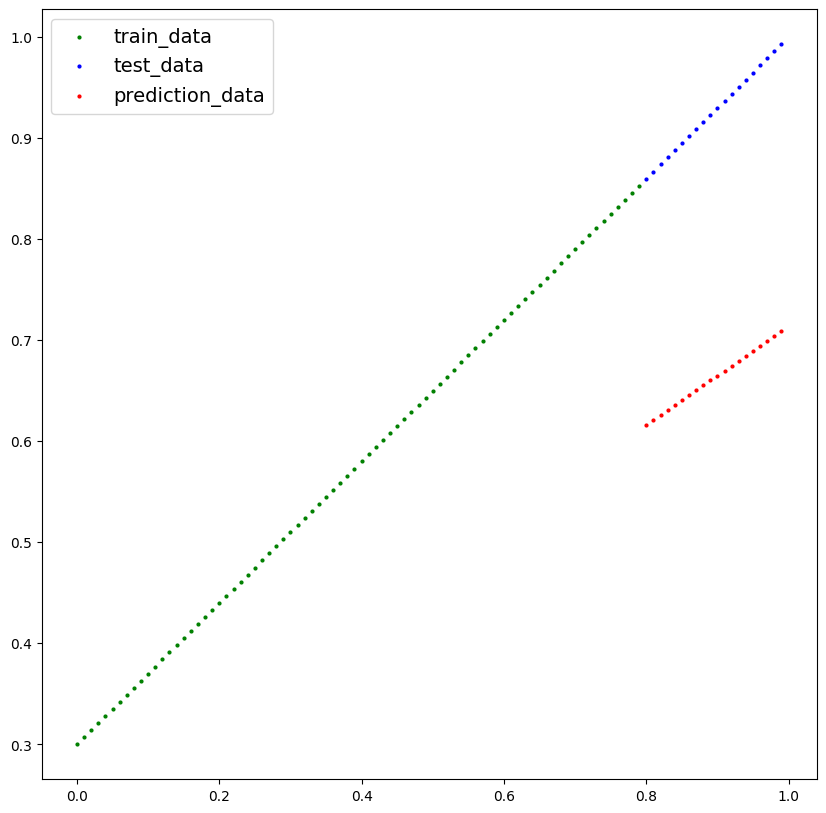

In [40]:
plot_predictions(predictions=y_pred)

# sample data

In [61]:
class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
next(model_1.parameters()).device

device(type='cpu')

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [51]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

In [63]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [64]:
torch.manual_seed(42)

epoches = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epoches):
  model_1.train()

  y_pred = model_1(X_train)
  #forward pass

  loss = loss_fn(y_pred,y_train)
  #loss function

  optimizer.zero_grad()
  #optimizer zero gradient

  loss.backward()
  #backward propagation

  optimizer.step()
  #optimizer step

  #evaluation
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoch%100==0:
    print(f'Epoch {epoch} | Train Loss {loss} | Test Loss {test_loss}')

Epoch 0 | Train Loss 0.5555006265640259 | Test Loss 0.5742346048355103
Epoch 100 | Train Loss 0.006589989177882671 | Test Loss 0.014520359225571156
Epoch 200 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146
Epoch 300 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146
Epoch 400 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146
Epoch 500 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146
Epoch 600 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146
Epoch 700 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146
Epoch 800 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146
Epoch 900 | Train Loss 0.006687174551188946 | Test Loss 0.009153103455901146


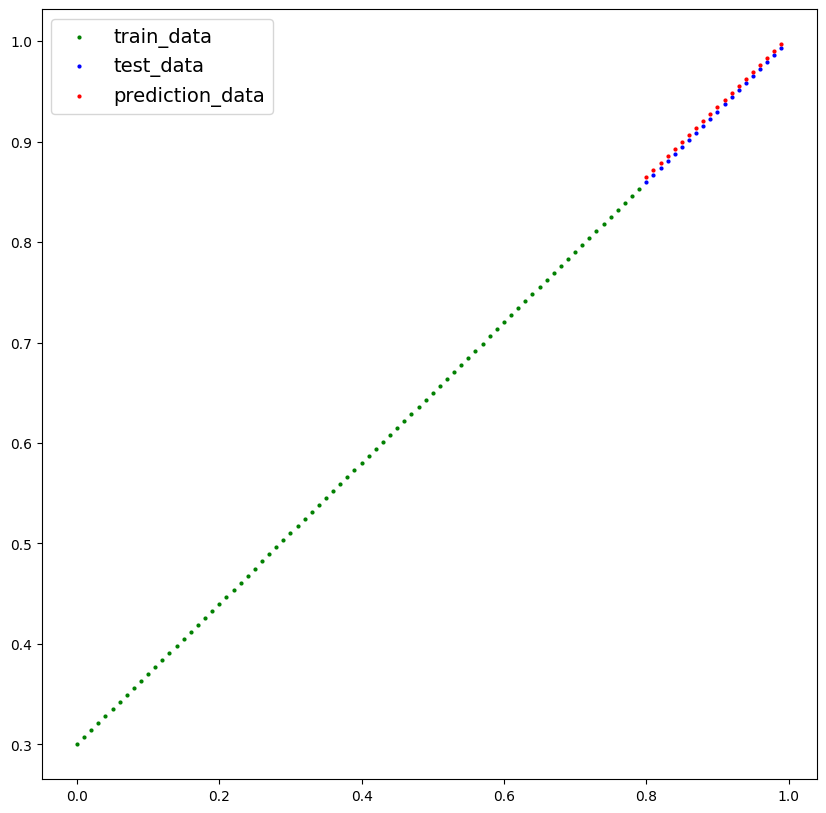

In [65]:
plot_predictions(predictions=test_pred)